## Q5. Show us what you can do! This is an optional free-form section. Do you have a data science skill that can separate you from other candidates? This is your chance to show it off. Here are some ideas to get you started, but you can answer this section any way you’d like.
## a. Anomaly detection. Can you spot any interesting anomalies or outliers in the data?
## b. Visualization. Create a visualization that reveals something interesting in the data or describes the data in a compelling way.
## c. Kaggle Grand Master-level model performance. Do you relish squeezing every last thousandth out of your F1 score? Develop a highly tuned, highly accurate model. Be sure to explain your approach to tuning and evaluating your model.
## d. Data augmentation. Can you find other public data sets that may improve your model? Ingest the data, join it to the original data set and explain how the new data did or did not improve your model’s performance.
## e. Come up with something we didn’t think of and impress us with your amazing findings!
## 
Given Instructions:
## Download and read the data into your tool of choice. This should be done programmatically so future maintainers of the code don’t need to download the data manually.

As the LendingClub loan data provisioned consists of records from the year 2007 to 2011, the obtained F1- score was quite low. Further, observed the class imbalance w.r.t "Fully Paid" and "Charged Off" loans.

To improve the accuracy & F1-Score, additional loan data from lending club has been used.

The loan data from the 2007 to 2018 has been considered for the analysis.

The data was obtained from the Kaggle datasets.

The dataset was downloaded from the following link.

https://www.kaggle.com/datasets/wordsforthewise/lending-club

The downloaded dataset was uploaded to the Azure ML Datasets.

And all the interested users can import the dataset to their workspace with the below given credentials for their analysis

In [ ]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '44d80c8e-af1f-4d8a-838c-2beb409a7a83'
resource_group = 'A_Container'
workspace_name = 'adsml'
# Remember to change the workspace_name your workspace name to get access to datasets.
workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='lc-extended-dataset')
dataset.download(target_path='.', overwrite=False)

### _Data Wrangling and Exploratory Data Analysis_



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
#Might be needed deprnding on the jupyter version
%matplotlib inline 


In [100]:
#Check for columns with missing values. 
#Drop columns if in case of the missing values exceeds a set threshold
#Drop duplicates if any
def drop_column(file, threshold=0.5):
    loanrec = pd.read_csv(file, low_memory=False)
    loanrec = loanrec.drop_duplicates()
    loanrec = loanrec.drop(['desc', 'url'], axis=1)
    threshold_count = len(loanrec)*threshold
    loanrec = loanrec.dropna(thresh=threshold_count, axis=1)
    loanrec = loanrec.drop_duplicates()
    return loanrec
df = drop_column('accepted_2007_to_2018Q4.csv', threshold=0.5)

In [7]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [5]:
df.groupby('addr_state')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
addr_state,,,,,,,,
AK,5231.0,79823.042942,42979.706499,0.0,52000.00,72000.0,98000.00,900000.0
AL,27284.0,70854.753011,45873.830433,0.0,45000.00,60320.0,85000.00,1700000.0
AR,17074.0,67588.154209,67420.051993,0.0,40000.00,57000.0,80000.00,6500000.0
AZ,53777.0,74186.970789,64671.632761,0.0,44500.00,62000.0,90000.00,5541120.0
CA,314533.0,83847.981089,83368.858241,0.0,50000.00,70000.0,100000.00,10999200.0
CO,48183.0,76948.312506,64195.555620,0.0,46874.10,65000.0,92000.00,7215069.0
CT,35785.0,86531.030855,100703.840859,0.0,50000.00,70000.0,100000.00,7000000.0
DC,5356.0,94553.070816,63185.751390,2140.0,60000.00,82000.0,112000.00,1123000.0
DE,6458.0,76689.292741,49973.861683,0.0,48000.00,65000.0,91000.00,1000000.0


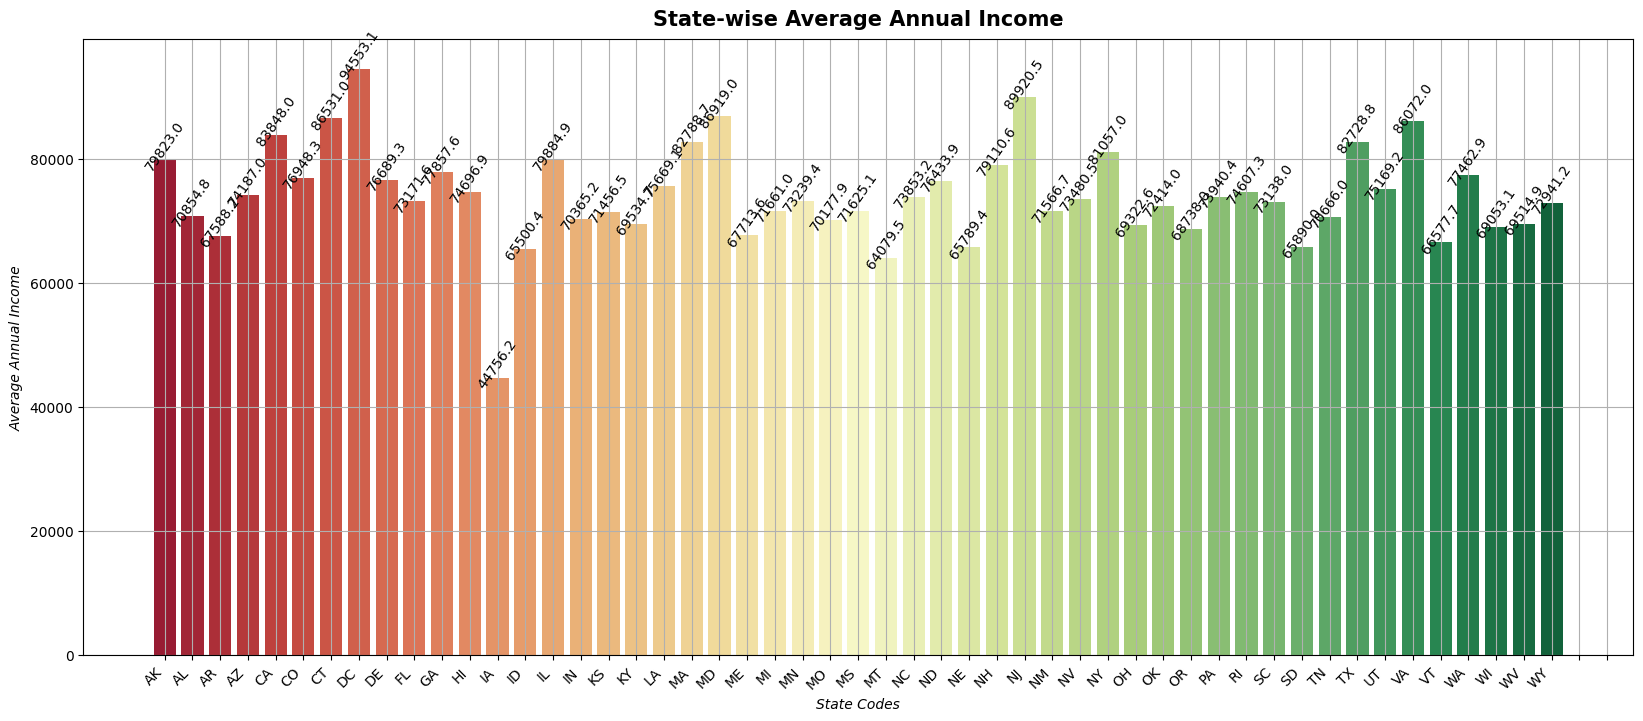

In [6]:
result = df.groupby('addr_state')['annual_inc'].mean() #.plot(kind = "bar")
plt.figure(figsize=(20,8))
ax_07 = sns.barplot(x = result.index, y = result.values, palette='RdYlGn')
ax_07.set_xticklabels(labels=list(result.index), fontsize=10)
plt.setp(ax_07.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel('State Codes', fontsize= 10, fontstyle='italic')
plt.ylabel('Average Annual Income', fontsize= 10, fontstyle='italic')
plt.title('State-wise Average Annual Income', fontsize= 15, fontweight='bold', pad=10)
plt.ylim(0,100)
plt.xlim(0,100)
   
for p in ax_07.patches:
    ax_07.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,100), list(result.index), fontsize=10, rotation=45)
plt.grid(True)
#plt.tight_layout()
plt.autoscale()
plt.show()

In [7]:
df['addr_state'].value_counts(dropna=True)

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

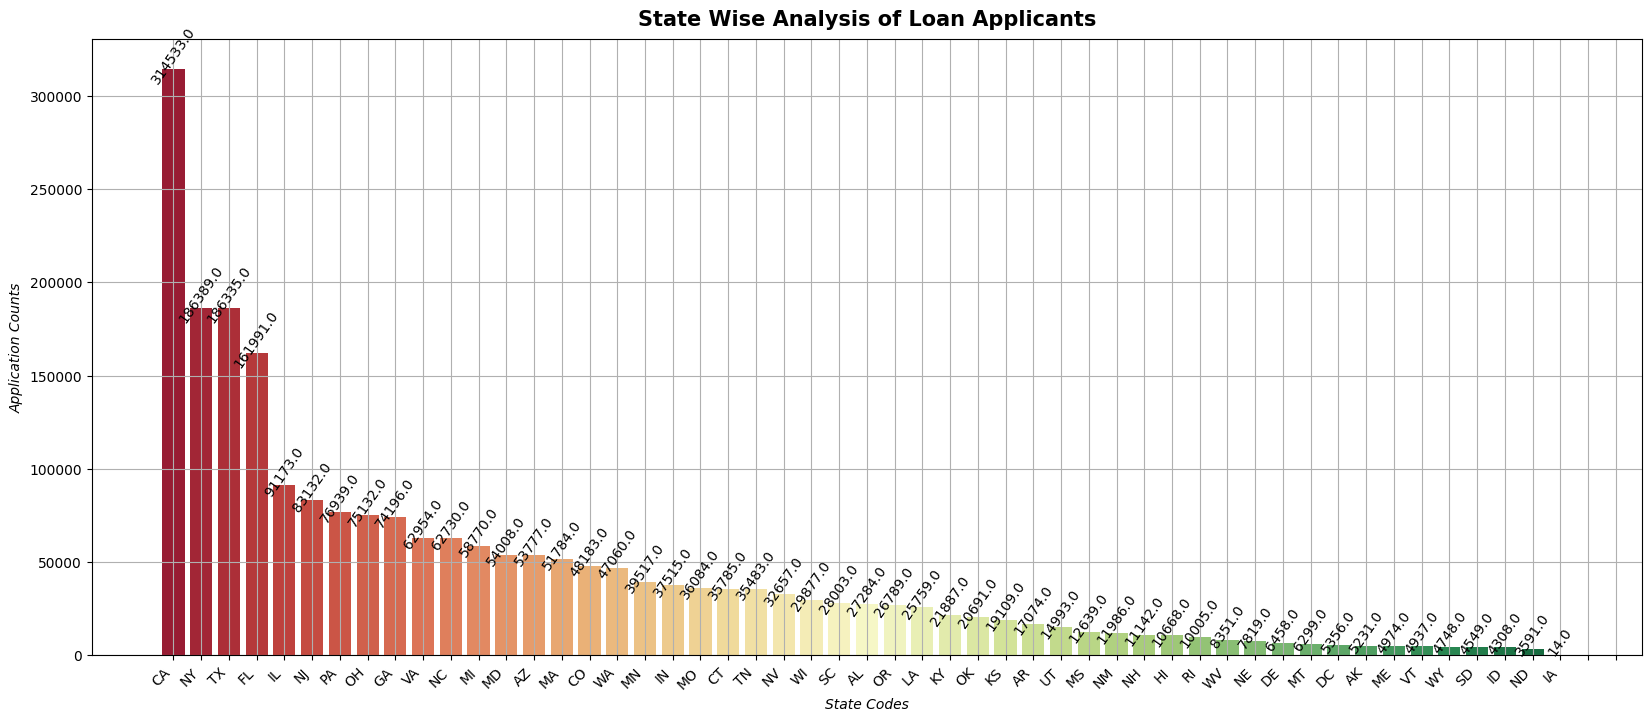

In [8]:
#result = processed_load.groupby('addr_state')['annual_inc'].mean() #.plot(kind = "bar")
result = df['addr_state'].value_counts(dropna=True)
plt.figure(figsize=(20,8))
ax_07 = sns.barplot(x = result.index, y = result.values, palette='RdYlGn')
ax_07.set_xticklabels(labels=list(result.index), fontsize=10)
plt.setp(ax_07.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel('State Codes', fontsize= 10, fontstyle='italic')
plt.ylabel('Application Counts', fontsize= 10, fontstyle='italic')
plt.title('State Wise Analysis of Loan Applicants', fontsize= 15, fontweight='bold', pad=10)
plt.ylim(0,100)
plt.xlim(0,100)
   
for p in ax_07.patches:
    ax_07.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,100), list(result.index), fontsize=10, rotation=45)
plt.grid(True)
#plt.tight_layout()
plt.autoscale()
plt.show()

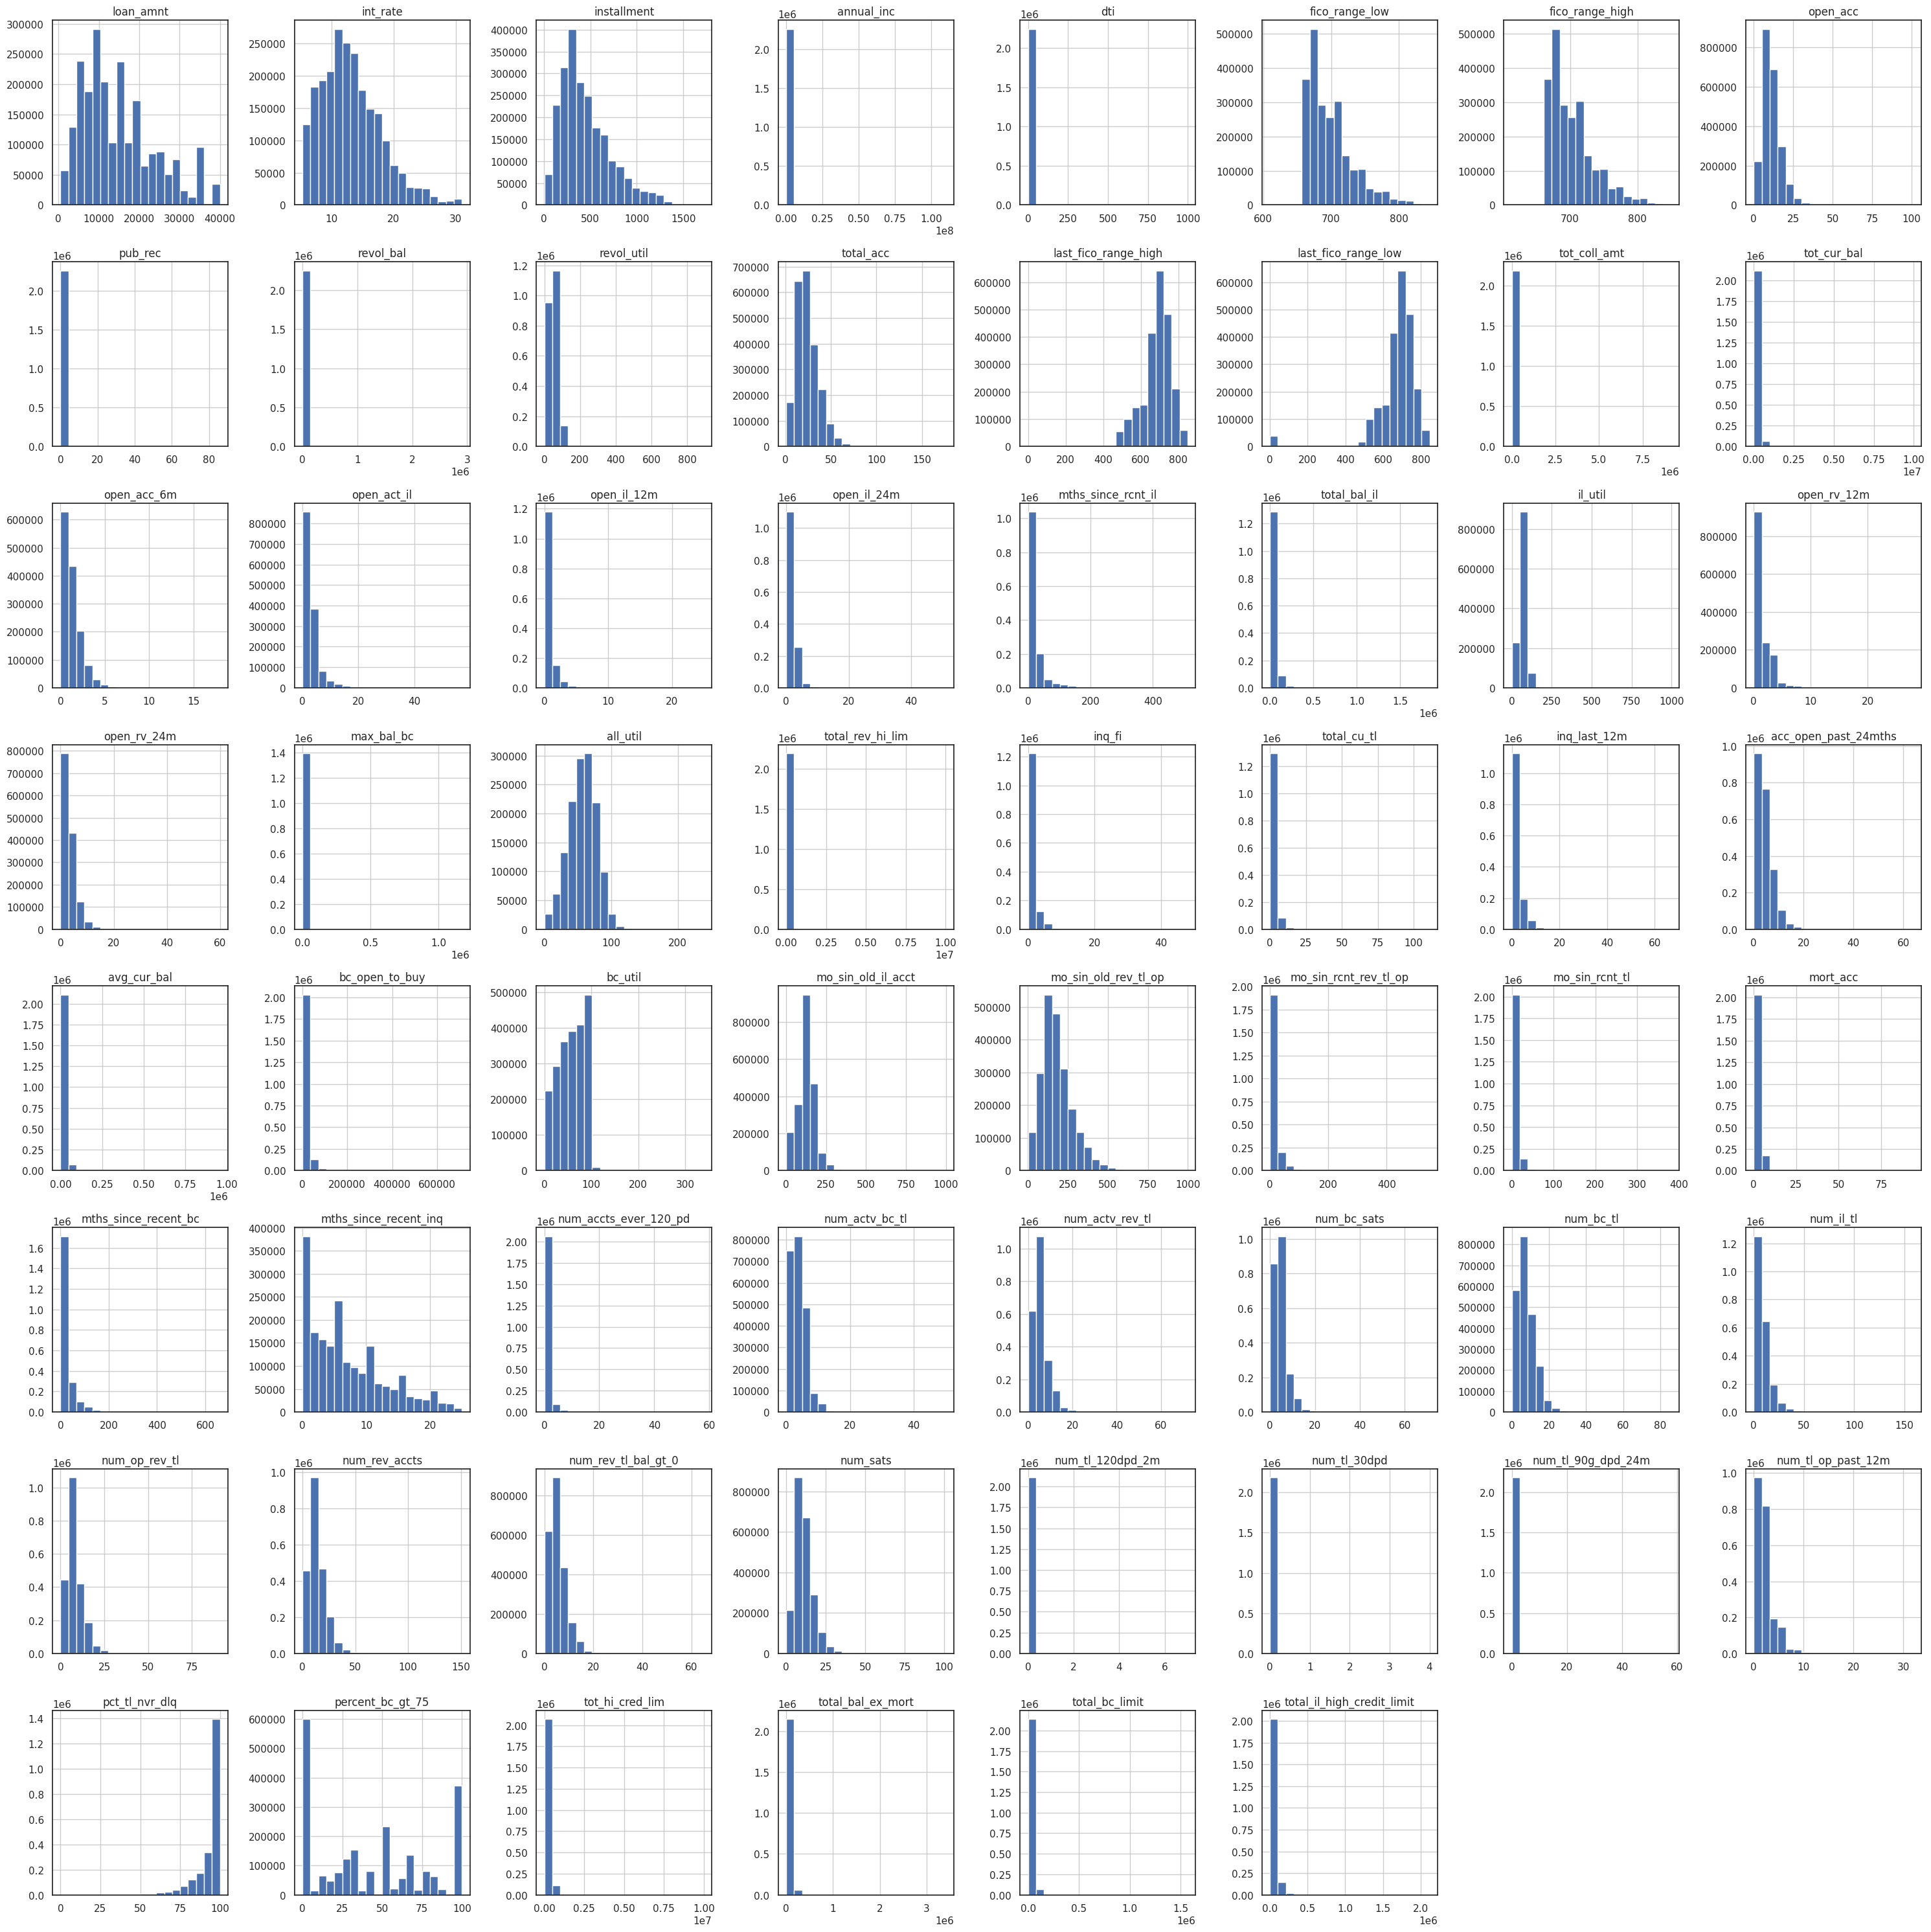

In [10]:
# Check the distribution of the numerical continous data
# The data is skewed and presence of outliers
df.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

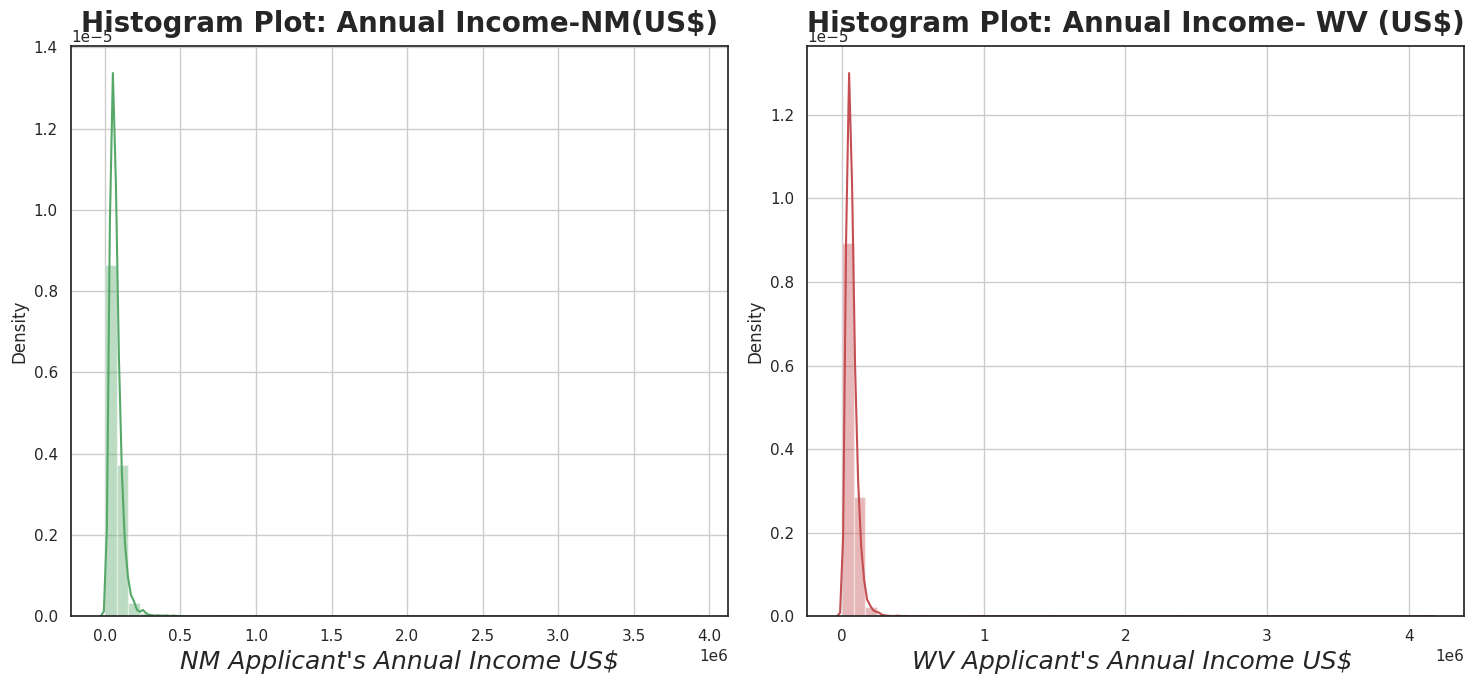

In [12]:
import warnings
warnings.filterwarnings('ignore')
result1 = df.loc[df['addr_state']=='NM']['annual_inc']
result2 = df.loc[df['addr_state']=='WV']['annual_inc']

plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)
sns.distplot(result1.values,hist= True ,color="g")
plt.title("Histogram Plot: Annual Income-NM(US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("NM Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.distplot(result2.values, hist= True ,color="r")
plt.title("Histogram Plot: Annual Income- WV (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("WV Applicant's Annual Income US$ ", fontsize= 18, fontstyle='italic')
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.tight_layout()
plt.show()

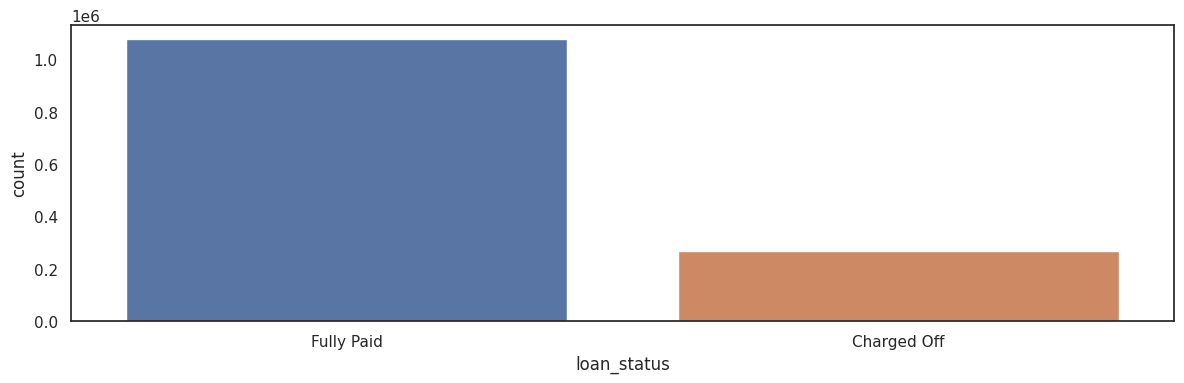

In [14]:
#Distribution of Target Variable
df1 = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]
sns.countplot(x="loan_status", data=df1)

In [15]:
# checking mean value of loan approved
# We just take "Fully Paid" and "Charged Off" columns
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]
mapping_dict = {
    "loan_status": {
        "Fully Paid": 1,
        "Charged Off": 0
    }
}
df = df.replace(mapping_dict)
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
1,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


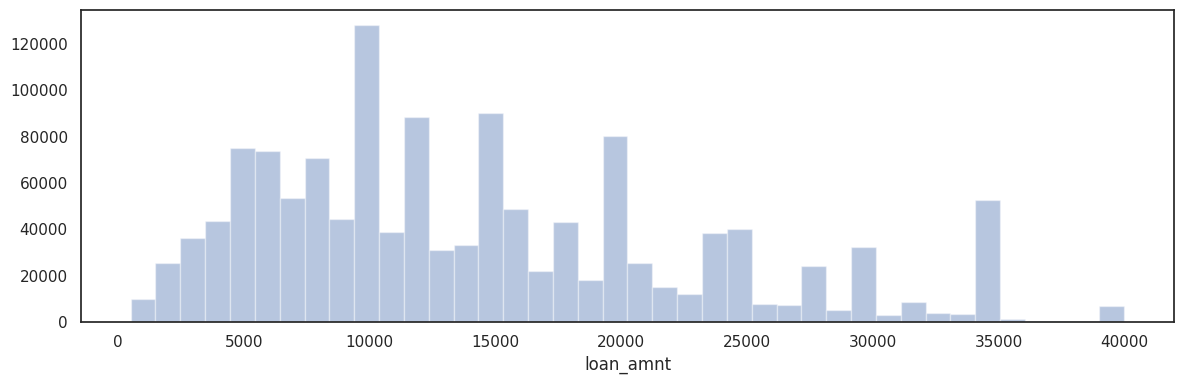

In [17]:
#distribution of loan amount
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"],kde=False,bins=40)

In [35]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.countplot(x=cat_var,hue="loan_status",data=df)
    plt.show()
    

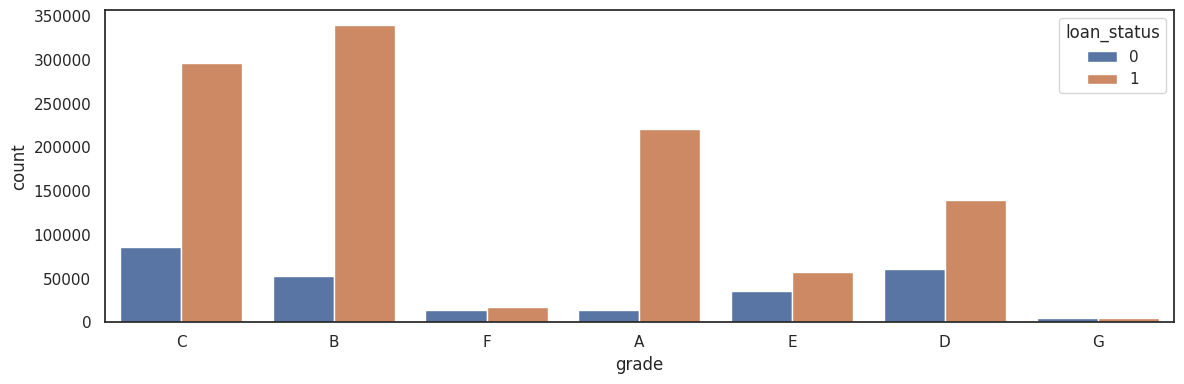

In [36]:
# compare default rates across grade of loan
plot_cat('grade')

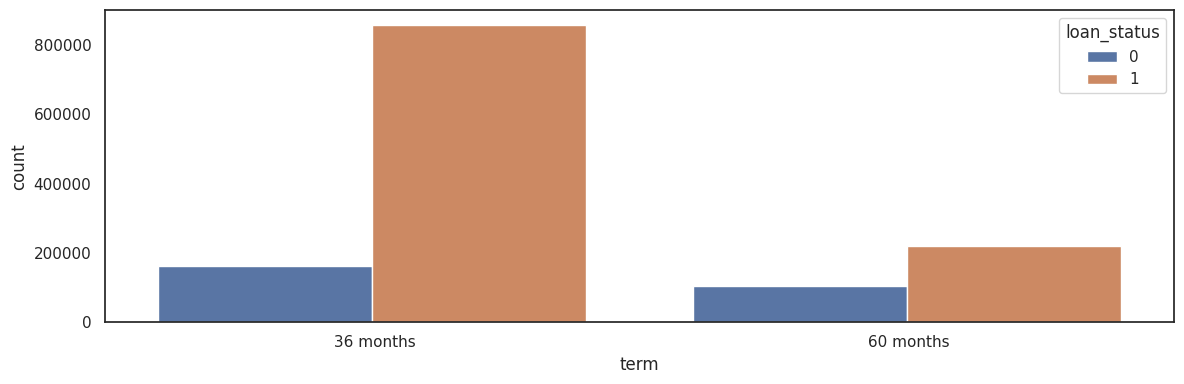

In [31]:
# term: 60 months loans default more than 36 months loans
plot_cat('term')

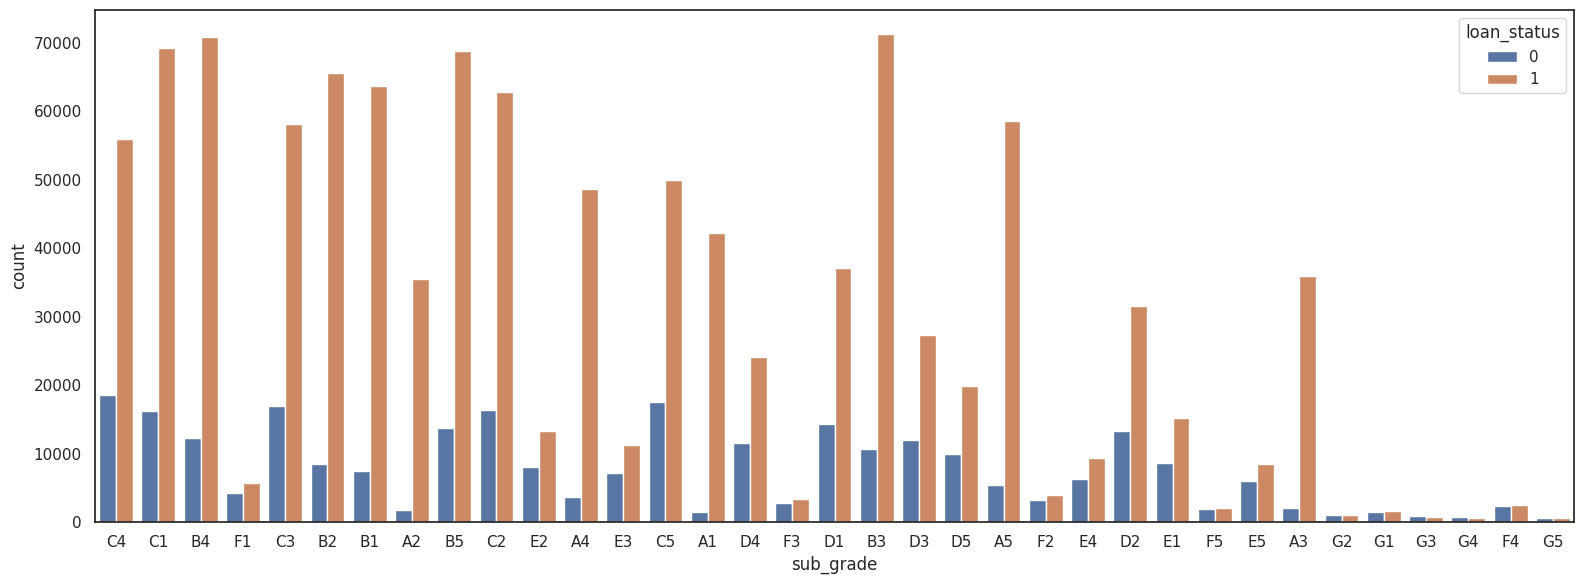

In [32]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

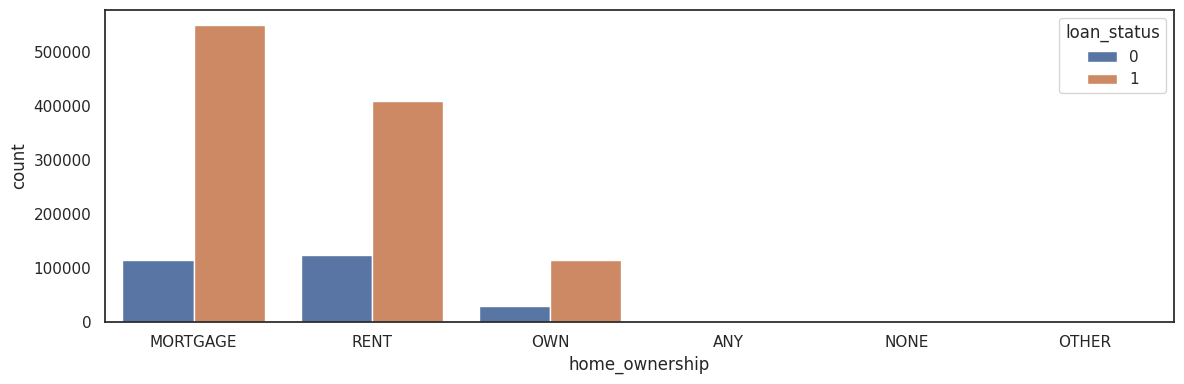

In [37]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

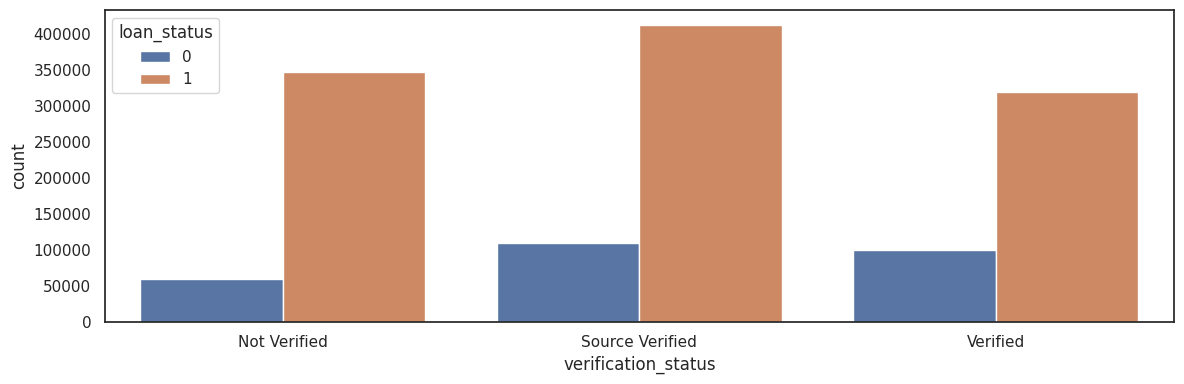

In [38]:
# verification_status: surprisingly, verified loans default more than not verified
plot_cat('verification_status')

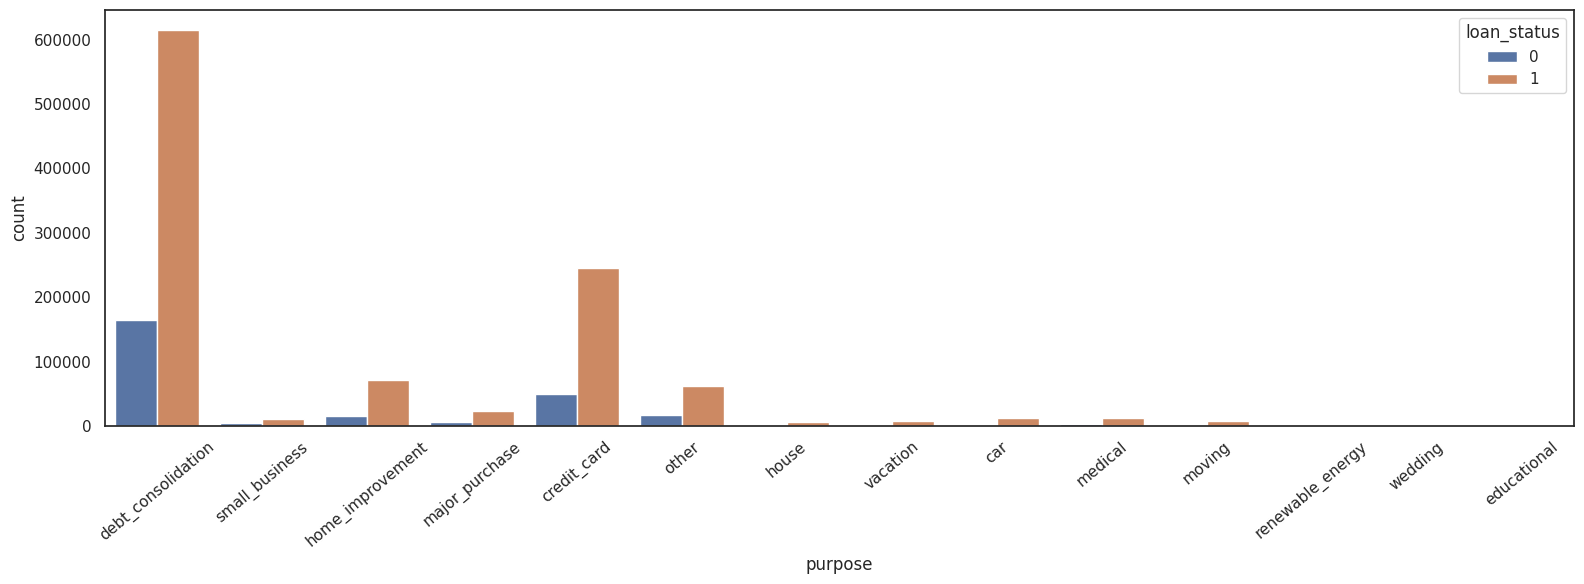

In [39]:
# purpose: small business loans default the most, then renewable energy and education
plt.figure(figsize=(16, 6))
# Rotating the labels on X-axis to avoid overlapping
plt.xticks(rotation=40) 
plot_cat('purpose')

In [44]:
df['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
4    Dec-2015
5    Dec-2015
Name: issue_d, dtype: object

In [53]:
from datetime import datetime
##Creating month and year columns based on 'issue_d' column
df['issue_d_month'] = df.issue_d.dt.month
df['issue_d_year'] = df.issue_d.dt.year

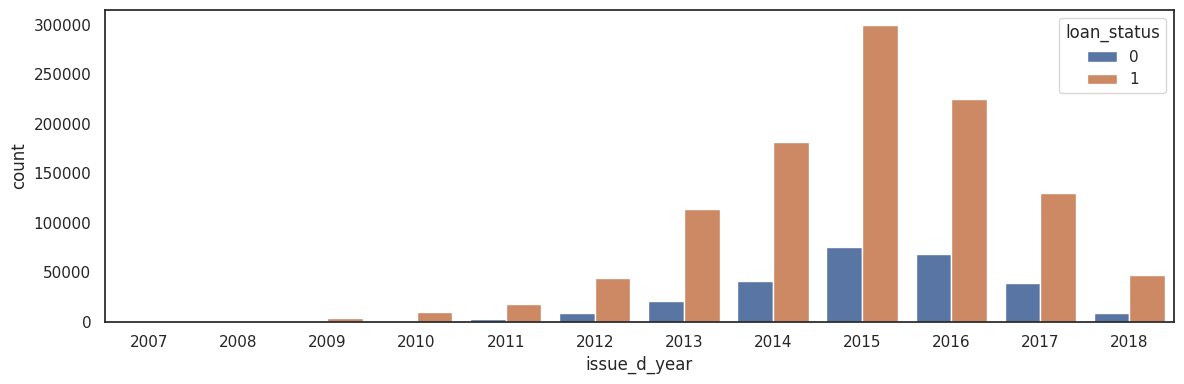

In [54]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('issue_d_year')

In [57]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

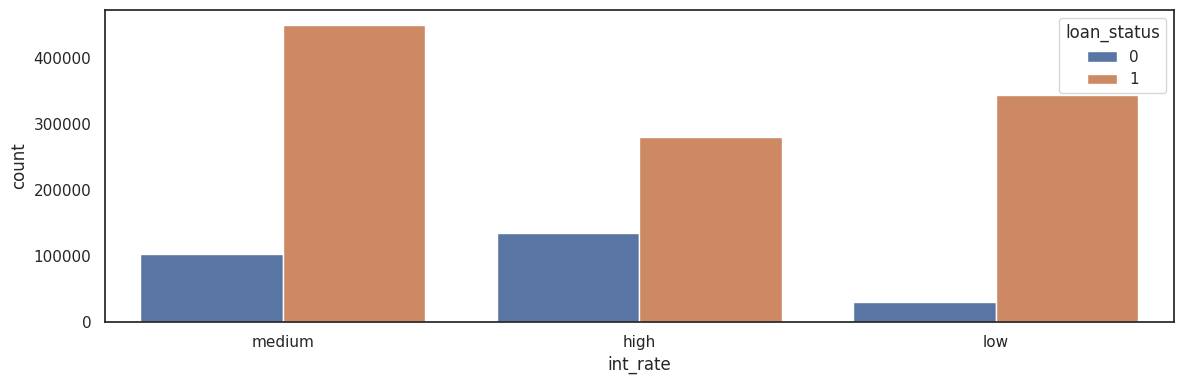

In [58]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_cat('int_rate')

In [59]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

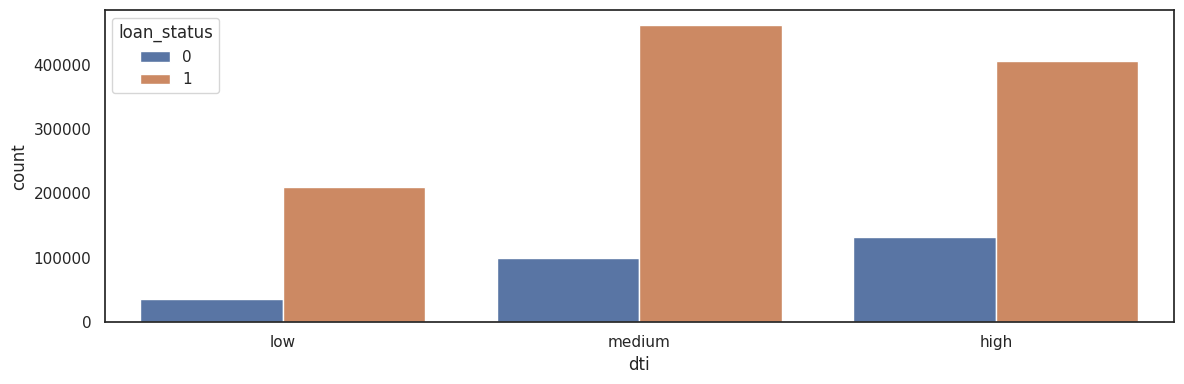

In [60]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

In [61]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

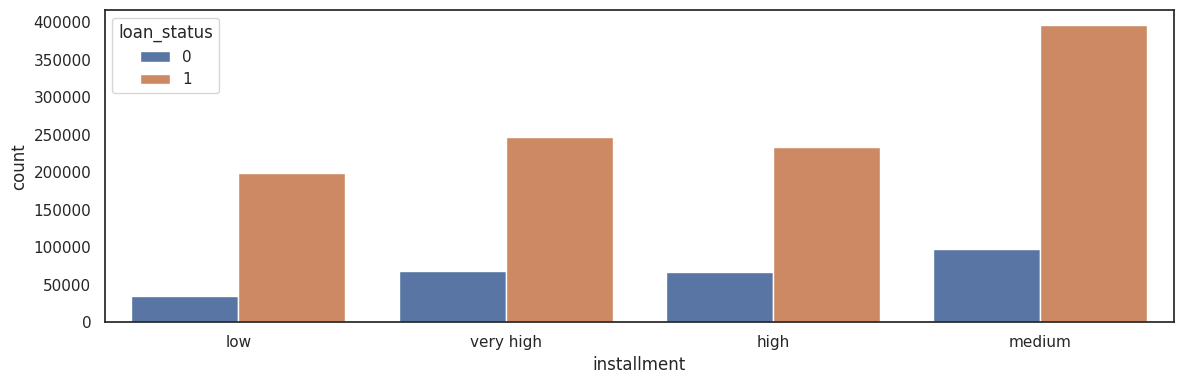

In [62]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

In [64]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

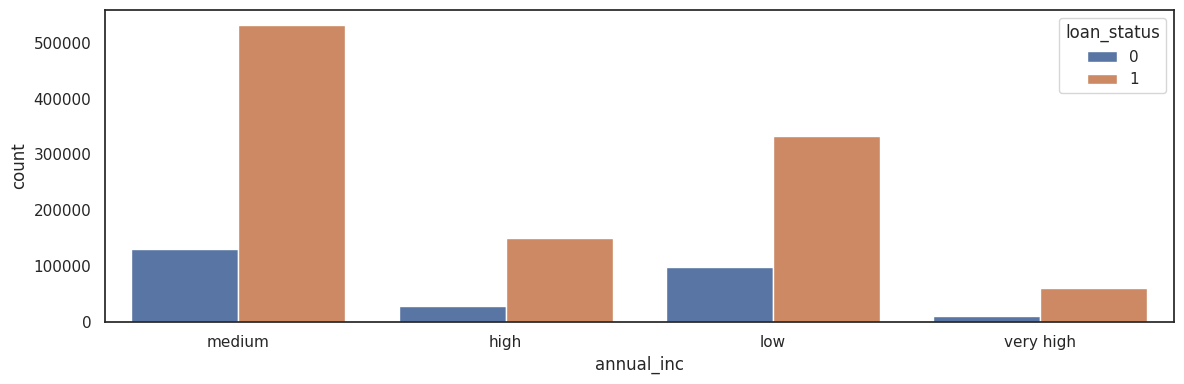

In [65]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat('annual_inc')

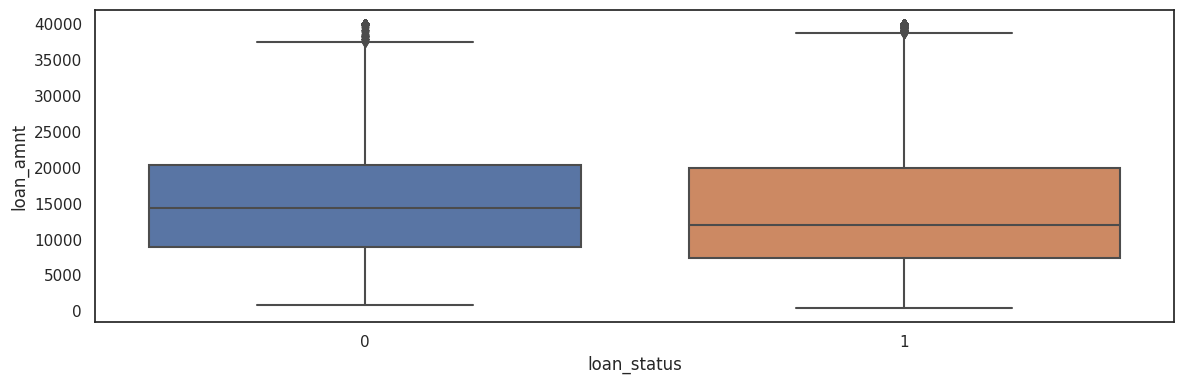

In [72]:
# creating boxplot 
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

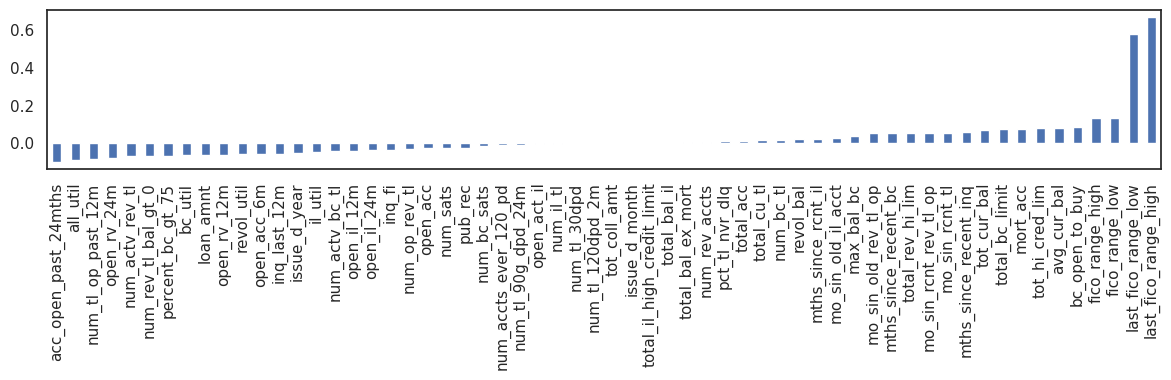

In [73]:

#creating corelation plot
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

## Based on the previous exploratory data analysis the following categories have been dropped from the dataset

In [3]:
#Check for columns with missing values. 
#Drop columns if in case of the missing values exceeds a set threshold
#Drop duplicates if any
def drop_column(file, threshold=0.5):
    loanrec = pd.read_csv(file, low_memory=False)
    loanrec = loanrec.drop_duplicates()
    loanrec = loanrec.drop(['desc', 'url'], axis=1)
    threshold_count = len(loanrec)*threshold
    loanrec = loanrec.dropna(thresh=threshold_count, axis=1)
    loanrec = loanrec.drop_duplicates()
    return loanrec
df = drop_column('accepted_2007_to_2018Q4.csv', threshold=0.5)

In [4]:
df = df.drop(["funded_amnt","funded_amnt_inv","grade","out_prncp","emp_title","out_prncp_inv", "issue_d", "zip_code", "collections_12_mths_ex_med", "policy_code", "chargeoff_within_12_mths","acc_now_delinq","delinq_amnt","pymnt_plan","delinq_2yrs", "inq_last_6mths","total_pymnt","total_pymnt_inv","total_rec_prncp", "total_rec_int","total_rec_late_fee","recoveries",
"collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d", "tax_liens","hardship_flag","pub_rec_bankruptcies","debt_settlement_flag"], axis=1)

In [9]:
df = df.drop(["id","installment","addr_state","application_type","disbursement_method"], axis=1)

In [10]:
# checking mean value of loan approved
# We just take "Fully Paid" and "Charged Off" columns
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]
mapping_dict = {
    "loan_status": {
        "Fully Paid": 1,
        "Charged Off": 0
    }
}
df = df.replace(mapping_dict)

In [11]:
#checking unique values in employ length
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [12]:
#creating an ordered list of employes
emp_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

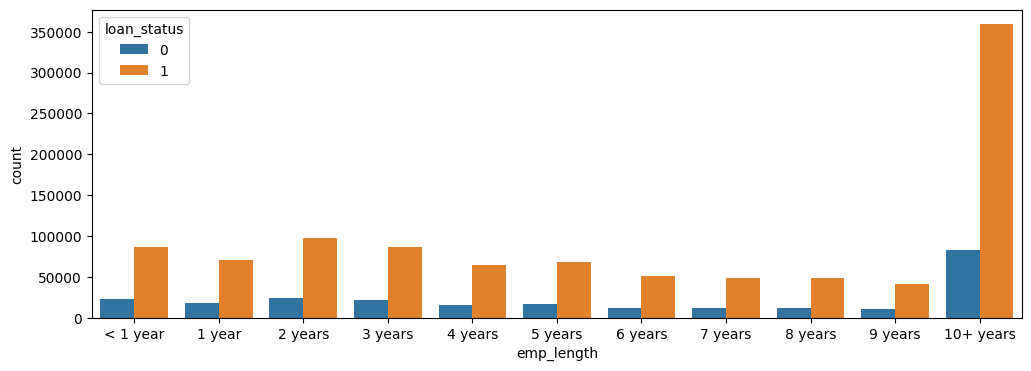

In [13]:
#creating employ length count plot setting hue as loan status
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length",data=df,order=emp_order,hue="loan_status")

In [14]:
#count of people those who didnt pay considering there emp length
emp_co=df[df["loan_status"]==0].groupby("emp_length").count()["loan_status"]

#count of people those who did pay considering there emp length
emp_fp=df[df["loan_status"]==1].groupby("emp_length").count()["loan_status"]

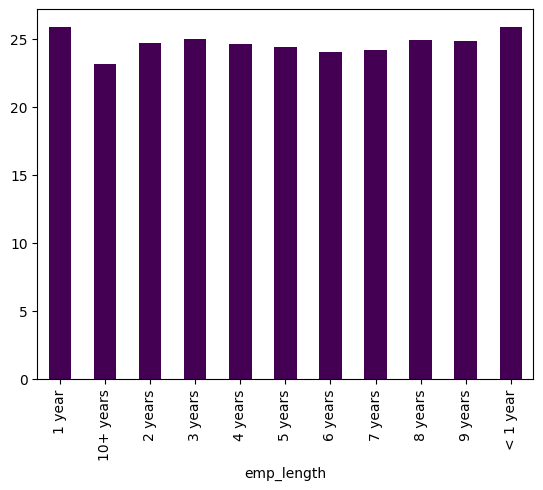

In [15]:
# % of people whoc didnt pay there loan considering there emp length
co_pre=emp_co*100/emp_fp

co_pre.plot(kind="bar",colormap="viridis")

In [16]:
#hence dropping emp length
df.drop("emp_length",axis=1,inplace=True)

In [17]:
(df.isnull().sum()/len(df))*100

loan_amnt                     0.000000
term                          0.000000
int_rate                      0.000000
sub_grade                     0.000000
home_ownership                0.000000
                                ...   
percent_bc_gt_75              4.575525
tot_hi_cred_lim               5.019438
total_bal_ex_mort             3.514506
total_bc_limit                3.514506
total_il_high_credit_limit    5.019438
Length: 70, dtype: float64

In [18]:
#since reflecting the same information hence dropping the column
df.drop("title",inplace=True,axis=1)

In [20]:
df.drop(["percent_bc_gt_75","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"], inplace=True,axis=1)

In [21]:
(df.isnull().sum()/len(df))*100

loan_amnt             0.000000
term                  0.000000
int_rate              0.000000
sub_grade             0.000000
home_ownership        0.000000
                        ...   
num_tl_120dpd_2m      8.726688
num_tl_30dpd          5.019438
num_tl_90g_dpd_24m    5.019438
num_tl_op_past_12m    5.019438
pct_tl_nvr_dlq        5.030885
Length: 64, dtype: float64

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 61 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              1345310 non-null  float64
 1   term                   1345310 non-null  object 
 2   int_rate               1345310 non-null  float64
 3   sub_grade              1345310 non-null  object 
 4   home_ownership         1345310 non-null  object 
 5   annual_inc             1345310 non-null  float64
 6   verification_status    1345310 non-null  object 
 7   loan_status            1345310 non-null  int64  
 8   purpose                1345310 non-null  object 
 9   dti                    1344936 non-null  float64
 10  earliest_cr_line       1345310 non-null  object 
 11  fico_range_low         1345310 non-null  float64
 12  fico_range_high        1345310 non-null  float64
 13  open_acc               1345310 non-null  float64
 14  pub_rec           

In [27]:
print((df.isnull().sum()/len(df))*100)

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
sub_grade              0.000000
home_ownership         0.000000
                         ...   
num_rev_accts          5.019512
num_rev_tl_bal_gt_0    5.019438
num_sats               4.150791
num_tl_op_past_12m     5.019438
pct_tl_nvr_dlq         5.030885
Length: 61, dtype: float64


In [28]:
#mortage accounts count
df["mort_acc"].value_counts()

0.0     523837
1.0     226135
2.0     188941
3.0     139381
4.0      94920
5.0      57632
6.0      32539
7.0      16850
8.0       8378
9.0       4285
10.0      2197
11.0      1206
12.0       640
13.0       356
14.0       244
15.0       132
16.0        93
17.0        61
18.0        48
19.0        29
20.0        25
24.0        16
21.0        14
22.0        14
23.0        10
25.0         9
27.0         8
26.0         6
28.0         4
29.0         4
34.0         3
30.0         2
32.0         2
37.0         2
31.0         2
51.0         1
47.0         1
36.0         1
35.0         1
Name: mort_acc, dtype: int64

In [29]:
#filling the mortage value
#Here we can see that mort acc is +vely correlated with total acc and the correlation is not that much high which is a good thing to predict mort_acc using total_acc
df.corr()["mort_acc"].sort_values()

int_rate                -0.083276
mths_since_recent_inq   -0.056300
mths_since_rcnt_il      -0.051131
mo_sin_rcnt_tl          -0.048676
il_util                 -0.048583
open_rv_24m             -0.045718
pct_tl_nvr_dlq          -0.035659
dti                     -0.029558
open_rv_12m             -0.026557
open_act_il             -0.023886
all_util                -0.021808
pub_rec                 -0.005783
tot_coll_amt             0.001461
bc_util                  0.003656
revol_util               0.026424
mo_sin_rcnt_rev_tl_op    0.026810
num_actv_bc_tl           0.035089
num_rev_tl_bal_gt_0      0.052026
num_actv_rev_tl          0.054191
mths_since_recent_bc     0.054317
num_tl_op_past_12m       0.054386
open_acc_6m              0.054928
acc_open_past_24mths     0.060103
open_il_12m              0.066822
num_bc_sats              0.069664
num_accts_ever_120_pd    0.071566
loan_status              0.075294
num_op_rev_tl            0.078646
num_il_tl                0.080351
total_bal_il  

In [30]:
df["mort_acc"]=df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [31]:
#dropping remaining data
df.dropna(inplace=True)

## Categorical Variables and Dummy Variables

In [32]:
df.select_dtypes(["object"]).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'earliest_cr_line', 'initial_list_status'],
      dtype='object')

In [33]:
#converting 36 mont to 36 numeric and same for 60
df["term"]=df["term"].apply(lambda x:int(x[:3]))

In [34]:
#converting the sub grade into dummy variables
dummies=pd.get_dummies(df["sub_grade"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("sub_grade",axis=1),dummies],axis=1)

In [36]:
#doing same thing for other categorical variables
dummies=pd.get_dummies(df[['verification_status','initial_list_status','purpose']],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop(['verification_status','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [37]:
#replacing none and any with other
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [38]:
#dropping and adding 
dummies=pd.get_dummies(df["home_ownership"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)

In [39]:
#earliesr cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [46]:
print(df.info(1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420513 entries, 0 to 2260697
Data columns (total 108 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   term                                 int64  
 2   int_rate                             float64
 3   annual_inc                           float64
 4   loan_status                          int64  
 5   dti                                  float64
 6   earliest_cr_line                     int64  
 7   fico_range_low                       float64
 8   fico_range_high                      float64
 9   open_acc                             float64
 10  pub_rec                              float64
 11  revol_bal                            float64
 12  revol_util                           float64
 13  total_acc                            float64
 14  last_fico_range_high                 float64
 15  last_fico_range_low             

In [47]:
#dropping remaining data
df.dropna(inplace=True)    
df = df.dropna(axis = 0)
print(df.dtypes.value_counts())
# ReIndexing after removing missing values
df = df.reset_index(drop=True)

float64    53
uint8      52
int64       3
dtype: int64


## Machine Learning Algorithms Training and Testing
## Train Test Split

In [109]:
#sampling the data
data=df.sample(frac=.5,random_state=101)

In [111]:
#dividing data into feature and target
from sklearn.model_selection import train_test_split
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [112]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
#scaling the data
#scaler=MinMaxScaler()
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## ML Libraries Import & Model Creation

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
#import logging
#logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

## Building Artificial Neural Network(ANN)

In [114]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [115]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
658/658 [==============================] - 1s 2ms/step - loss: 0.9533 - val_loss: 0.2489
Epoch 2/25
658/658 [==============================] - 1s 2ms/step - loss: 0.2899 - val_loss: 0.2422
Epoch 3/25
658/658 [==============================] - 1s 2ms/step - loss: 0.2675 - val_loss: 0.2389
Epoch 4/25
658/658 [==============================] - 1s 2ms/step - loss: 0.2575 - val_loss: 0.2327
Epoch 5/25
658/658 [==============================] - 1s 2ms/step - loss: 0.2488 - val_loss: 0.2345
Epoch 6/25
658/658 [==============================] - 1s 2ms/step - loss: 0.2453 - val_loss: 0.2329
Epoch 7/25
658/658 [==============================] - 1s 2ms/step - loss: 0.2397 - val_loss: 0.2242
Epoc

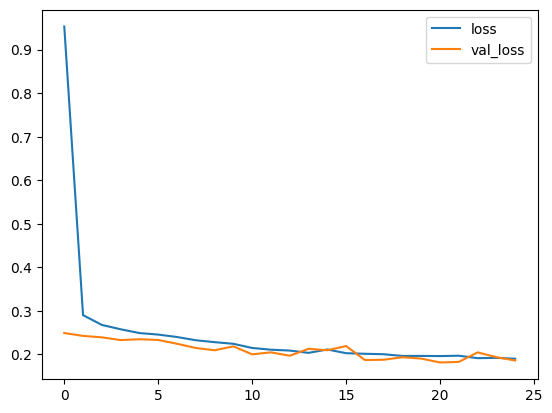

In [116]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [117]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

predict=model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      9674
           1       0.96      0.96      0.96     32378

    accuracy                           0.93     42052
   macro avg       0.91      0.90      0.91     42052
weighted avg       0.93      0.93      0.93     42052



In [118]:
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1
0,8249,1425
1,1391,30987


In [ ]:
!pip install xgboost

## Building and Training Classical ML Models

In [121]:
#trying other Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [122]:
clf=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10),
     GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
     XGBClassifier()]

In [125]:
import pickle
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    filename = str(x)[:8]+'V1'+'minusIBT'+'.sav'
    pickle.dump(cl, open(filename, 'wb'))
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

In [126]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      9674
           1       0.96      0.94      0.95     32378

    accuracy                           0.93     42052
   macro avg       0.89      0.90      0.90     42052
weighted avg       0.93      0.93      0.93     42052

[[ 8351  1323]
 [ 1804 30574]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      9674
           1       0.95      0.96      0.96     32378

    accuracy                           0.93     42052
   macro avg       0.91      0.90      0.91     42052
weighted avg       0.93      0.93      0.93     42052

[[ 8073  1601]
 [ 1169 31209]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      9674
           1       0.91      0.84      0.87     32378

    accuracy                           0.81     42052
   macro avg       0.74      0.79      0.76     42052
weighted avg

## Handling Imbalanced Data For a Classification Problem to achieve better F1-Score

## a. Resampling (Oversampling and Undersampling)

## b. SMOTE (Synthetic Minority Oversampling Technique or SMOTE )

In [131]:
df['loan_status'].value_counts()

1    323881
0     96632
Name: loan_status, dtype: int64

## a. Resampling (Oversampling a Minority Class)

In [132]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['loan_status']==1)] 
df_minority = df[(df['loan_status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 323881, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [133]:
import pickle
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    filename = str(x)[:8]+'V2'+'ibtResample'+'.sav'
    pickle.dump(cl, open(filename, 'wb'))
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

#sampling the data
data=df_upsampled.sample(frac=.5,random_state=101)

#scaling the data
#scaler=MinMaxScaler()
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     32315
           1       0.89      0.90      0.90     32462

    accuracy                           0.90     64777
   macro avg       0.90      0.90      0.90     64777
weighted avg       0.90      0.90      0.90     64777

[[28875  3440]
 [ 3321 29141]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     32315
           1       0.92      0.93      0.93     32462

    accuracy                           0.92     64777
   macro avg       0.92      0.92      0.92     64777
weighted avg       0.92      0.92      0.92     64777

[[29718  2597]
 [ 2284 30178]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     32315
           1       0.91      0.75      0.82     32462

    accuracy                           0.84     64777
   macro avg       0.85      0.84      0.84     64777
weighted avg

In [ ]:
!pip install -U imbalanced-learn

## b. SMOTE (Synthetic Minority Oversampling Technique or SMOTE )

In [134]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('loan_status', axis=1), df['loan_status'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [135]:
import pickle
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    filename = str(x)[:8]+'V3'+'ibtSMOTE'+'.sav'
    pickle.dump(cl, open(filename, 'wb'))
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

#sampling the data
data=oversampled.sample(frac=.5,random_state=101)

#scaling the data
#scaler=MinMaxScaler()
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     32432
           1       0.96      0.86      0.91     32345

    accuracy                           0.91     64777
   macro avg       0.92      0.91      0.91     64777
weighted avg       0.92      0.91      0.91     64777

[[31274  1158]
 [ 4419 27926]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     32432
           1       0.94      0.94      0.94     32345

    accuracy                           0.94     64777
   macro avg       0.94      0.94      0.94     64777
weighted avg       0.94      0.94      0.94     64777

[[30504  1928]
 [ 2060 30285]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     32432
           1       0.91      0.86      0.88     32345

    accuracy                           0.89     64777
   macro avg       0.89      0.89      0.89     64777
weighted avg

In [ ]:
#Use the saved model for new predictions
import pickle
# load the model from disk
loaded_model = pickle.load(open('XGBClassV3ibtSMOTE.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)